In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("in_data.txt",names=["x","y"])
x=np.array(df.x)
y=np.array(df.y)
theta = np.zeros((2,1))

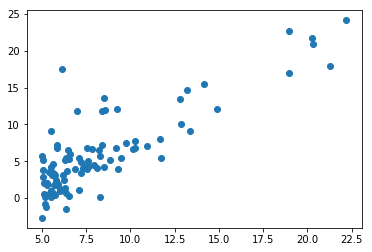

In [3]:
## Scatterploting
# plt.xlabel('Population of City in 10,000s')
# plt.ylabel('Profit in $10,000s')
plt.scatter(x, y)

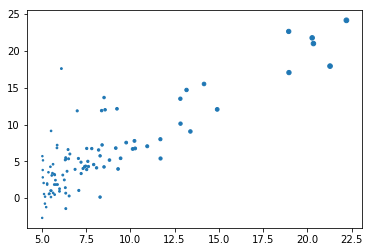

In [4]:
### Linear regression Implementation Using libraries.
m,c=np.polyfit(x,y,1)
m,c
pred=np.polyval([m,c],x)
plt.scatter(x,y,pred)

In [5]:
### Gradient descendent
def linear_regression(x,y,m_current=0,b_current=0,epoch=1000,learning_rate=0.0001):
    n=float(len(y))
    for i in range(epoch):
        y_current=m_current*x+b_current
        cost=sum([data**2 for data in (y-y_current)])/n
        m_gradient=-(2/n)* sum(x*(y-y_current))
        b_gradient=-(2/n)* sum(y-y_current)
        m_current=m_current-(learning_rate*m_gradient)
        b_current=b_current-(learning_rate*b_gradient)
    
    return m_current,b_current, cost


In [6]:
linear_regression(x,y)

(0.8077926520338518, -0.061043725300537886, 11.631643093013958)

In [7]:
print(m,c)

1.1930336441895937 -3.8957808783118533


In [10]:
### Using Sklearn
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [11]:
reg = linear_model.LinearRegression()

In [18]:
df_x=pd.DataFrame(df.x)
df_y=pd.DataFrame(df.y)
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=1)

In [19]:
## modeling
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print(reg.coef_[0])
print(reg.intercept_)

[1.19613297]
[-3.83547853]


In [25]:
a=reg.predict(x_test)

In [27]:
np.mean((a-y_test)**2) ## Errorr

y    8.862284
dtype: float64